In [465]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

## Load files

In [466]:
M1 = np.loadtxt("txt_files_py/prob2bisAdaptive0001_2.txt") #probCleanNicoCorrect30deg  probNicoWide3 prob2bisNico25deg
M2 = np.loadtxt("txt_files_py/prob2bisNico25deg.txt") #probCleanStandard  probStandard prob2bisStandard
print('M1 shape:', M1.shape)
print('M2 shape:', M2.shape)
if(M2.shape[0] > M1.shape[0]):
    M2 = M2[:M1.shape[0],:]
else:
    M1 = M1[:M2.shape[0],:]
    
M1[:,0] = np.linspace(3.66, 38.84, M1[:,0].shape[0])
M2[:,0] = np.linspace(3.66, 38.84, M1[:,0].shape[0])

M1 shape: (533, 16)
M2 shape: (537, 16)


## Compute p mean

#### Nicolas

In [467]:
# Careful: I took out first and last laser for all p because laser detect computer...
M1_p = M1[:,2:-1]
middle1 = int(M1_p.shape[1]/2)+1
M1_p_mean = np.nanmean(M1_p,axis=1)
p1 = np.mean(M1_p_mean)
print('p =',p1)

M1_p_r = M1[:,2:middle1+1]
M1_p_mean_r = np.nanmean(M1_p_r,axis=1)
p1_r = np.mean(M1_p_mean_r)
print('p_right =',p1_r)

M1_p_l = M1[:,middle1+2:-1]
M1_p_mean_l = np.nanmean(M1_p_l,axis=1)
p1_l = np.mean(M1_p_mean_l)
print('p_left =',p1_l)


p = 0.7874120905306682
p_right = 0.7672550854524703
p_left = 0.8827988925578486


#### Standard

In [468]:
M2_p = M2[:,2:-1]
middle2 = int(M2_p.shape[1]/2)+1
M2_p_mean = np.nanmean(M2_p,axis=1)
p2 = np.mean(M2_p_mean)
print('p =',p2)

M2_p_r = M2[:,2:middle2+1]
M2_p_mean_r = np.nanmean(M2_p_r,axis=1)
p2_r = np.mean(M2_p_mean_r)
print('p_right =',p2_r)

M2_p_l = M2[:,middle2+2:-1]
M2_p_mean_l = np.nanmean(M2_p_l,axis=1)
p2_l = np.mean(M2_p_mean_l)
print('p_left =',p2_l)

p = 0.789322565011209
p_right = 0.7734484232288931
p_left = 0.8782709134146341


In [469]:
a = middle1+1
a

8

#### Mean for each beam for both cases

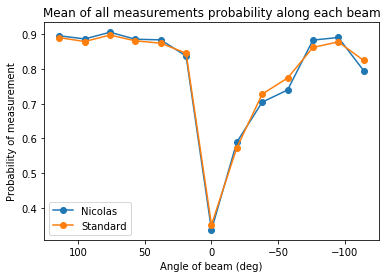

In [470]:
step = 135*2 / M1[:,1:].shape[1]+1
alpha = (np.arange(M1_p.shape[1])-round(M1_p.shape[1]/2))*step
plt.plot(alpha, np.nanmean(M1_p,axis=0), 'o-', label='Nicolas')
plt.plot(alpha, np.nanmean(M2_p,axis=0), 'o-', label='Standard')
plt.title('Mean of all measurements probability along each beam')
plt.xlabel('Angle of beam (deg)')
plt.ylabel('Probability of measurement')

plt.gca().invert_xaxis()
plt.legend()

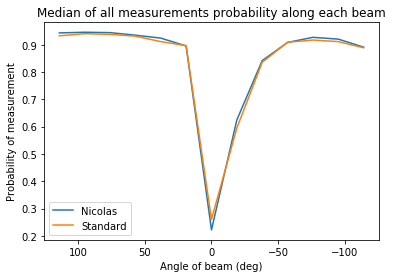

In [471]:
plt.plot(alpha, np.nanmedian(M1_p,axis=0), label='Nicolas')
plt.plot(alpha, np.nanmedian(M2_p,axis=0), label='Standard')
plt.title('Median of all measurements probability along each beam')
plt.xlabel('Angle of beam (deg)')
plt.ylabel('Probability of measurement')

plt.gca().invert_xaxis()
plt.legend()

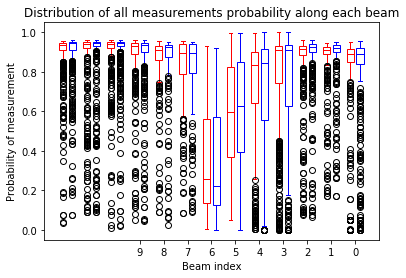

In [472]:
def draw_plot(data, offset,edge_color, fill_color):
    pos = np.arange(data.shape[1])+offset 
    # Filter data using np.isnan
    mask = ~np.isnan(data)
    filtered_data = [d[m] for d, m in zip(data.T, mask.T)]
    bp = ax.boxplot(filtered_data, positions= pos, widths=0.3, patch_artist=True, manage_xticks=False)
    for element in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)
    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)

fig, ax = plt.subplots()
draw_plot(M1_p, -0.2, "blue", "white")
draw_plot(M2_p, +0.2,"red", "white")
plt.xticks(xrange(10))
plt.title('Distribution of all measurements probability along each beam')
plt.xlabel('Beam index')
plt.ylabel('Probability of measurement')

plt.gca().invert_xaxis()
plt.show()

## Plot distribution

#### Nicolas

(array([0.04055419, 0.03564728, 0.02092654, 0.02366864, 0.02886419,
        0.02467889, 0.03939962, 0.0482032 , 0.16957714, 0.5684803 ]),
 array([8.33333000e-04, 1.00704100e-01, 2.00574866e-01, 3.00445633e-01,
        4.00316400e-01, 5.00187167e-01, 6.00057933e-01, 6.99928700e-01,
        7.99799467e-01, 8.99670233e-01, 9.99541000e-01]),
 <a list of 10 Patch objects>)

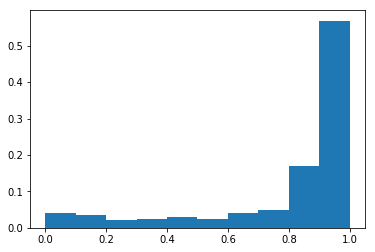

In [473]:
M1_flat = M1_p.flatten()
M1_flat = M1_flat[~np.isnan(M1_flat)]
weights = np.ones_like(M1_flat)/float(len(M1_flat))
plt.hist(M1_flat, weights=weights)

#### Standard

(array([0.03666811, 0.02641836, 0.0285838 , 0.02367547, 0.02656273,
        0.02483037, 0.03464703, 0.05947741, 0.20845965, 0.53067706]),
 array([8.33333000e-04, 1.00690800e-01, 2.00548266e-01, 3.00405733e-01,
        4.00263200e-01, 5.00120666e-01, 5.99978133e-01, 6.99835600e-01,
        7.99693067e-01, 8.99550533e-01, 9.99408000e-01]),
 <a list of 10 Patch objects>)

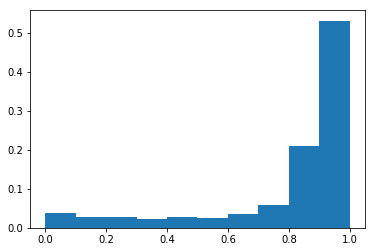

In [474]:
M2_flat = M2_p.flatten()
M2_flat = M2_flat[~np.isnan(M2_flat)]
weights = np.ones_like(M2_flat)/float(len(M2_flat))
plt.hist(M2_flat, weights=weights)

## During time

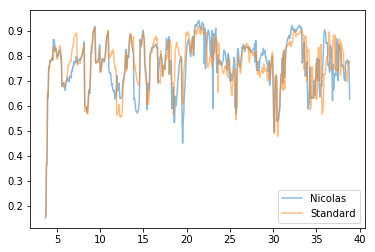

In [475]:
plt.plot(M1[:,0],M1_p_mean_r, label='Nicolas', alpha=0.5)
plt.plot(M2[:,0],M2_p_mean_r, label='Standard', alpha=0.5)
plt.legend()

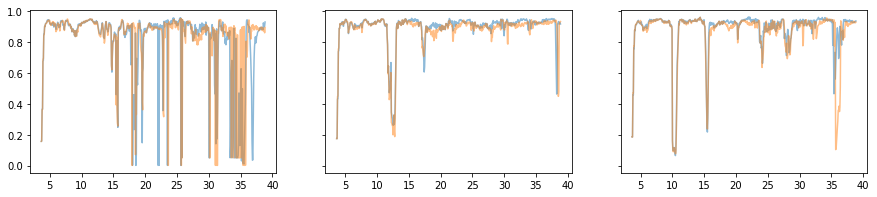

In [476]:
fig, ax = plt.subplots(1,3,sharex=True,sharey=True, figsize=(15,3))
ax[0].plot(M1[:,0],M1_p[:,0], label='nico', alpha=0.5)
ax[0].plot(M2[:,0],M2_p[:,0], label='standard', alpha=0.5)
ax[1].plot(M1[:,0],M1_p[:,1], label='nico', alpha=0.5)
ax[1].plot(M2[:,0],M2_p[:,1], label='standard', alpha=0.5)
ax[2].plot(M1[:,0],M1_p[:,2], label='nico', alpha=0.5)
ax[2].plot(M2[:,0],M2_p[:,2], label='standard', alpha=0.5)

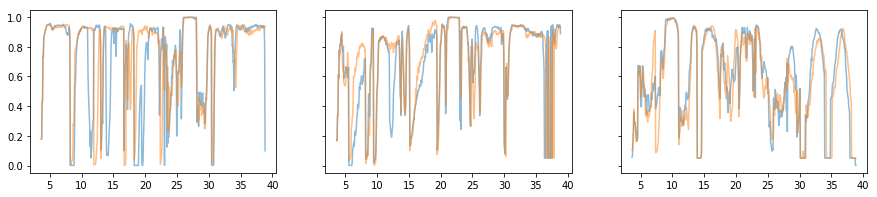

In [477]:
fig, ax = plt.subplots(1,3,sharex=True,sharey=True, figsize=(15,3))
ax[0].plot(M1[:,0],M1_p[:,3], label='nico', alpha=0.5)
ax[0].plot(M2[:,0],M2_p[:,3], label='standard', alpha=0.5)
ax[1].plot(M1[:,0],M1_p[:,4], label='nico', alpha=0.5)
ax[1].plot(M2[:,0],M2_p[:,4], label='standard', alpha=0.5)
ax[2].plot(M1[:,0],M1_p[:,5], label='nico', alpha=0.5)
ax[2].plot(M2[:,0],M2_p[:,5], label='standard', alpha=0.5)

In [478]:
if M2.shape[1] > 16:
    fig, ax = plt.subplots(1,3,sharex=True,sharey=True, figsize=(15,3))
    ax[0].plot(M1[:,0],M1_p[:,6], label='nico', alpha=0.5)
    ax[0].plot(M2[:,0],M2_p[:,6], label='standard', alpha=0.5)
    ax[1].plot(M1[:,0],M1_p[:,7], label='nico', alpha=0.5)
    ax[1].plot(M2[:,0],M2_p[:,7], label='standard', alpha=0.5)
    ax[2].plot(M1[:,0],M1_p[:,8], label='nico', alpha=0.5)
    ax[2].plot(M2[:,0],M2_p[:,8], label='standard', alpha=0.5)

In [479]:
if M2.shape[1] > 16:
    fig, ax = plt.subplots(1,3,sharex=True,sharey=True, figsize=(15,3))
    ax[0].plot(M1[:,0],M1_p[:,9], label='nico', alpha=0.5)
    ax[0].plot(M2[:,0],M2_p[:,9], label='standard', alpha=0.5)
    ax[1].plot(M1[:,0],M1_p[:,10], label='nico', alpha=0.5)
    ax[1].plot(M2[:,0],M2_p[:,10], label='standard', alpha=0.5)
    ax[2].plot(M1[:,0],M1_p[:,11], label='nico', alpha=0.5)
    ax[2].plot(M2[:,0],M2_p[:,11], label='standard', alpha=0.5)

In [480]:
if M2.shape[1] > 16:
    fig, ax = plt.subplots(1,3,sharex=True,sharey=True, figsize=(15,3))
    ax[0].plot(M1[:,0],M1_p[:,12], label='nico', alpha=0.5)
    ax[0].plot(M2[:,0],M2_p[:,12], label='standard', alpha=0.5)
    ax[1].plot(M1[:,0],M1_p[:,13], label='nico', alpha=0.5)
    ax[1].plot(M2[:,0],M2_p[:,13], label='standard', alpha=0.5)
    ax[2].plot(M1[:,0],M1_p[:,14], label='nico', alpha=0.5)
    ax[2].plot(M2[:,0],M2_p[:,14], label='standard', alpha=0.5)

In [481]:
def plot_beam_graph(beam_index, plot_mean=False):
    plt.figure(figsize=(15,3))
    plt.plot(M1[:,0],M1_p[:,beam_index], label='Nicolas', alpha=0.5, color='tab:blue', linewidth=2)
    plt.plot(M2[:,0],M2_p[:,beam_index], label='Standard', alpha=0.5, color='tab:orange',linewidth=2)
    if plot_mean == True:
        plt.plot(M1[:,0],np.ones((M1[:,0].shape[0]))*np.nanmean(M1_p[:,beam_index]), alpha=0.5, color='tab:blue',linewidth=1)
        plt.plot(M2[:,0],np.ones((M2[:,0].shape[0]))*np.nanmean(M2_p[:,beam_index]), alpha=0.5, color='tab:orange', linewidth=1)
    plt.legend()
    print('p_nicolas =',np.nanmean(M1_p[:,beam_index]), 'p_standard =', np.nanmean(M2_p[:,beam_index]))

In [482]:
def plot_beam_graph_mult(beam_indexes):
    nb_plots = beam_indexes.shape[0]
    fig, ax = plt.subplots(nb_plots, 1, sharey=True, sharex=True, figsize=(15,3*nb_plots))
    fig.text(0.5, 0.07, 'Time (s)', ha='center')
    fig.text(0.07, 0.5, 'Probability of measurement', va='center', rotation='vertical')
    for i in range(nb_plots):
        ax[i].plot(M1[:,0],M1_p[:,beam_indexes[i]], label='Rabany-Jiang (T=25deg)', alpha=0.5, color='tab:blue', linewidth=2)
        ax[i].plot(M1[:,0],M2_p[:,beam_indexes[i]], label='Standard', alpha=0.5, color='tab:orange', linewidth=2)
        ax[i].legend()
        p_nicolas = format(np.nanmean(M1_p[:,beam_indexes[i]]),'.2f')
        p_standard = format(np.nanmean(M2_p[:,beam_indexes[i]]),'.2f')
        angle = format(alpha[beam_indexes[i]], '.0f')
        ax[i].set_title('alpha={}deg    (p_nicolas={},  p_standard={})'.format(angle, p_nicolas, p_standard))

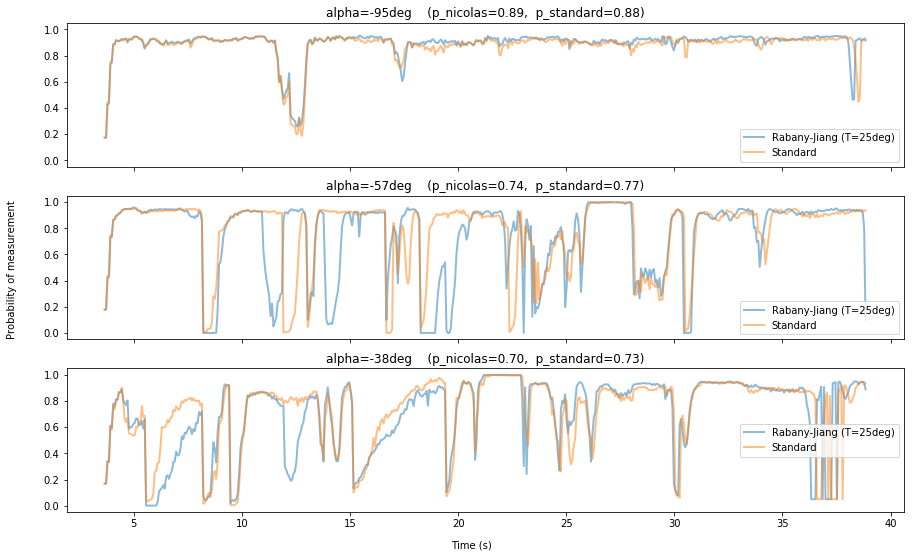

In [483]:
beam_indexes = np.array([1,3,4])
plot_beam_graph_mult(beam_indexes)

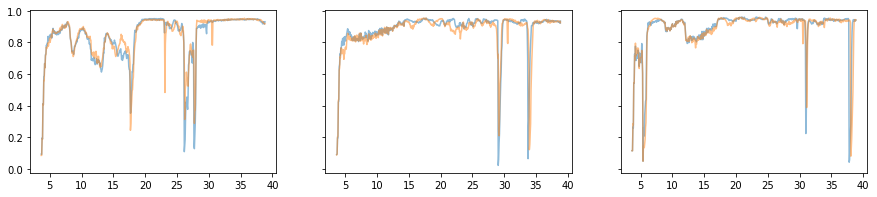

In [484]:
fig, ax = plt.subplots(1,3,sharex=True,sharey=True, figsize=(15,3))
ax[0].plot(M1[:,0],M1_p[:,7], label='nico', alpha=0.5)
ax[0].plot(M2[:,0],M2_p[:,7], label='standard', alpha=0.5)
ax[1].plot(M1[:,0],M1_p[:,8], label='nico', alpha=0.5)
ax[1].plot(M2[:,0],M2_p[:,8], label='standard', alpha=0.5)
ax[2].plot(M1[:,0],M1_p[:,9], label='nico', alpha=0.5)
ax[2].plot(M2[:,0],M2_p[:,9], label='standard', alpha=0.5)

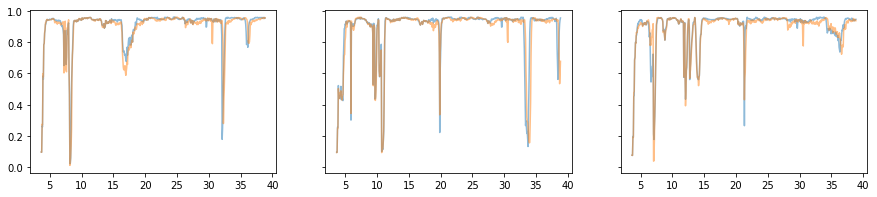

In [485]:
fig, ax = plt.subplots(1,3,sharex=True,sharey=True, figsize=(15,3))
ax[0].plot(M1[:,0],M1_p[:,10], label='nico', alpha=0.5)
ax[0].plot(M2[:,0],M2_p[:,10], label='standard', alpha=0.5)
ax[1].plot(M1[:,0],M1_p[:,11], label='nico', alpha=0.5)
ax[1].plot(M2[:,0],M2_p[:,11], label='standard', alpha=0.5)
ax[2].plot(M1[:,0],M1_p[:,12], label='nico', alpha=0.5)
ax[2].plot(M2[:,0],M2_p[:,12], label='standard', alpha=0.5)